In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
#ライブラリ

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings

In [108]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spaceship/data/test.csv")

#欠損値、異常値確認

In [131]:
df.head(50)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Cabin_num,Side
0,0013_01,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,6,3,1
1,0018_01,0,0,2,19.0,0,0.0,0.0,0.0,0.0,0.0,Lerome Peckers,5,4,1
2,0019_01,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,0,1
3,0021_01,1,0,2,38.0,0,0.0,0.0,0.0,0.0,0.0,Meratz Caltilter,2,1,1
4,0023_01,0,0,2,20.0,0,10.0,10.0,10.0,10.0,10.0,Brence Harperez,5,5,1
5,0027_01,0,0,2,31.0,0,0.0,0.0,0.0,0.0,0.0,Karlen Ricks,5,7,0
6,0029_01,1,1,0,21.0,0,0.0,0.0,0.0,0.0,0.0,Aldah Ainserfle,1,2,0
7,0032_01,1,1,2,20.0,0,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,3,0,1
8,0032_02,1,1,0,23.0,0,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,3,0,1
9,0033_01,0,0,0,24.0,0,0.0,0.0,0.0,0.0,0.0,Eliana Delazarson,5,7,1


In [128]:
df.isnull() .sum()


,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,57
FoodCourt,57
ShoppingMall,57
Spa,57


In [130]:
df['RoomService'].unique()

array([0.0000e+00, 1.0000e+01, 3.3900e+02, 9.3200e+02, 2.0000e+00,
       2.6000e+01,        nan, 3.9000e+01, 1.7840e+03, 2.9300e+02,
       5.9800e+02, 1.4000e+01, 4.8300e+02, 6.6000e+01, 1.0000e+00,
       1.0370e+03, 3.9660e+03, 4.6000e+01, 4.1300e+02, 3.7800e+02,
       3.2000e+01, 8.3200e+02, 3.6200e+02, 7.5600e+02, 1.9700e+02,
       6.0000e+00, 2.6100e+02, 1.6690e+03, 4.4000e+01, 3.3000e+01,
       7.1700e+02, 4.7620e+03, 7.4100e+02, 3.0000e+00, 7.8600e+02,
       2.5560e+03, 1.8600e+02, 1.3400e+03, 6.9600e+02, 1.5420e+03,
       1.0800e+02, 3.1860e+03, 4.1000e+01, 1.0540e+03, 6.0000e+01,
       3.0100e+02, 1.2300e+02, 9.8000e+01, 2.1200e+02, 7.3000e+01,
       3.7600e+02, 5.0000e+00, 1.0310e+03, 3.5600e+02, 6.3800e+02,
       1.3950e+03, 2.3000e+01, 8.0000e+00, 1.3000e+02, 2.7300e+02,
       2.8800e+02, 7.3100e+02, 1.6780e+03, 4.9080e+03, 8.7000e+01,
       4.0000e+00, 7.0800e+02, 6.4200e+02, 6.5800e+02, 2.3900e+02,
       1.8900e+02, 1.2900e+02, 1.2800e+02, 1.0300e+03, 5.3000e

In [132]:
# DataFrameの列データ型を確認
print(df['RoomService'].dtypes)


float64


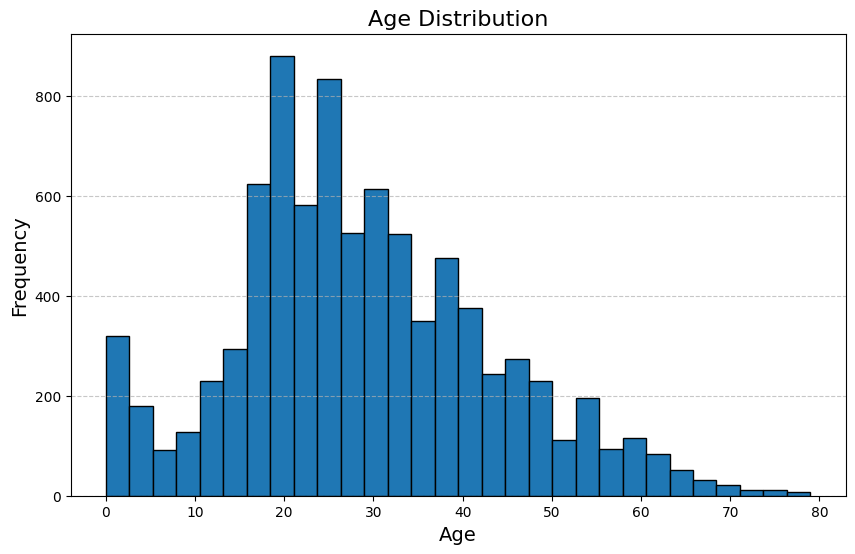

In [ ]:


import matplotlib.pyplot as plt

# MonthlyIncomeの分布をヒストグラムで表示
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#HomePlanet
乗客が出発した惑星。通常は永住している惑星。

In [110]:
# 欠損値をUnknownで補完
df['HomePlanet'] = df['HomePlanet'].fillna('Unknown')

# データ型を文字列に変換
df['HomePlanet'] = df['HomePlanet'].astype(str)

label_encoder = LabelEncoder()
df['HomePlanet'] = label_encoder.fit_transform(df['HomePlanet'])

# 対応表を確認
print("\nラベル対応表:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded}")


ラベル対応表:
Earth: 0
Europa: 1
Mars: 2
Unknown: 3


In [111]:
df['HomePlanet'].isnull().sum()

0

#CryoSleep
乗客が航海中、仮死状態になることを選択したかどうかを示します。冷凍睡眠中の乗客は客室内に閉じ込められます。

In [112]:
# 欠損値をUnknownで補完
df['CryoSleep'] = df['CryoSleep'].fillna('Unknown')

# データ型を文字列に変換
df['CryoSleep'] = df['CryoSleep'].astype(str)

# ラベルエンコーディング
label_encoder = LabelEncoder()
df['CryoSleep'] = label_encoder.fit_transform(df['CryoSleep'])

# 対応表を確認
print("\nラベル対応表:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded}")


ラベル対応表:
False: 0
True: 1
Unknown: 2


#Cabin
乗客が滞在しているキャビン番号です。「デッキ/番号/側」という形式で表され、「側」にはPort（左舷）を表すPまたはStarboard（右舷）を表すSが入ります。

In [113]:
# スラッシュで区切り、新しい列を作成
df[['Deck', 'Cabin_num', 'Side']] = df['Cabin'].str.split('/', expand=True)

In [114]:
# 元のCabin列を削除
df = df.drop(columns=['Cabin'])

##Deck

In [115]:
# 欠損値をUnknownで補完
df['Deck'] = df['Deck'].fillna('Unknown')

# データ型を文字列に変換
df['Deck'] = df['Deck'].astype(str)

# ラベルエンコーディング
label_encoder = LabelEncoder()
df['Deck'] = label_encoder.fit_transform(df['Deck'])

# 対応表を確認
print("\nラベル対応表:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded}")


ラベル対応表:
A: 0
B: 1
C: 2
D: 3
E: 4
F: 5
G: 6
T: 7
Unknown: 8


##Side

In [116]:
# 欠損値をUnknownで補完
df['Side'] = df['Side'].fillna('Unknown')

# データ型を文字列に変換
df['Side'] = df['Side'].astype(str)

# ラベルエンコーディング
label_encoder = LabelEncoder()
df['Side'] = label_encoder.fit_transform(df['Side'])

# 対応表を確認
print("\nラベル対応表:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded}")


ラベル対応表:
P: 0
S: 1
Unknown: 2


##Cabin_num

In [117]:
print(df['Cabin_num'].dtypes)

object


In [118]:
from sklearn.ensemble import RandomForestRegressor

# 欠損値がないデータと欠損値があるデータに分割
train = df[df['Cabin_num'].notnull()]
test = df[df['Cabin_num'].isnull()]

# 特徴量と目的変数を分割
X_train = train[['Deck', 'Side']]  # 他の特徴量を選択
y_train = train['Cabin_num']
X_test = test[['Deck', 'Side']]

# カテゴリ変数のエンコーディング
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# モデルの学習と予測
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# 欠損値を補完
df.loc[df['Cabin_num'].isnull(), 'Cabin_num'] = predictions


#Destination
乗客が下船する惑星。

In [119]:
# 欠損値をUnknownで補完
df['Destination'] = df['Destination'].fillna('Unknown')

# データ型を文字列に変換
df['Destination'] = df['Destination'].astype(str)

# ラベルエンコーディング
label_encoder = LabelEncoder()
df['Destination'] = label_encoder.fit_transform(df['Destination'])

# 対応表を確認
print("\nラベル対応表:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded}")


ラベル対応表:
55 Cancri e: 0
PSO J318.5-22: 1
TRAPPIST-1e: 2
Unknown: 3


#Age
乗客の年齢。

In [120]:
# 中央値で欠損値を補完
df['Age'].fillna(df['Age'].median(), inplace=True)



# 中央値を確認
print("\n中央値:")
print(df['Age'].median())


中央値:
26.0


<ipython-input-120-6f0bc914a2e5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


#VIP
乗客が航海中に特別な VIP サービスに対して料金を支払ったかどうか。

In [121]:
# 欠損値をUnknownで補完
df['VIP'] = df['VIP'].fillna('Unknown')

# データ型を文字列に変換
df['VIP'] = df['VIP'].astype(str)

# ラベルエンコーディング
label_encoder = LabelEncoder()
df['VIP'] = label_encoder.fit_transform(df['VIP'])

# 対応表を確認
print("\nラベル対応表:")
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {encoded}")


ラベル対応表:
False: 0
True: 1
Unknown: 2


#宇宙船タイタニック号の多くの豪華なアメニティのそれぞれに対して乗客が請求した金額。

##RoomService

In [122]:
#同じ行のCryoSleepの値が1の場合は0をそれ以外の場合は欠損値のまま

df['RoomService'] = df.apply(
    lambda row: 0 if pd.isnull(row['RoomService']) and row['CryoSleep'] == 1 else row['RoomService'],
    axis=1
)

##FoodCourt

In [123]:
df['FoodCourt'] = df.apply(
    lambda row: 0 if pd.isnull(row['RoomService']) and row['CryoSleep'] == 1 else row['RoomService'],
    axis=1
)

##ShoppingMall

In [124]:
df['ShoppingMall'] = df.apply(
    lambda row: 0 if pd.isnull(row['RoomService']) and row['CryoSleep'] == 1 else row['RoomService'],
    axis=1
)

##Spa

In [125]:
df['Spa'] = df.apply(
    lambda row: 0 if pd.isnull(row['RoomService']) and row['CryoSleep'] == 1 else row['RoomService'],
    axis=1
)

##VRDeck

In [126]:
df['VRDeck'] = df.apply(
    lambda row: 0 if pd.isnull(row['RoomService']) and row['CryoSleep'] == 1 else row['RoomService'],
    axis=1
)

#CSV出力

In [133]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/spaceship/data/test_G1.csv", index=False)